In [39]:
#En este apartado, cargamos las librerias que vamos a utilizar, luego creamos la solicitud a la web desde la cual queremos extrer el texto y finalmente mostramos el texto para
#asegurarnos que nos trae el texto que queremos

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re



url = 'https://www.4rentargentina.com/futbol-argentina/equipos/boca-juniors-historia' #URL que se va a utilizar para extraer texto

res = requests.get(url) #Se realiza la solicitud HTTP a la URL que le pasamos como parametro
res.raise_for_status() #Genera una expecion en caso de error

sopa = BeautifulSoup(res.text, 'html.parser') #Para analizar el contenido de la URL

texto = sopa.find('div', id='scbox').get_text() #Extraemos el texto contenido en el 'div' con id 'scbox' en el codigo HTML de la pagina web elegida ya que alli figura el texto que vamos a utilizar
texto




'\n\nFútbol Argentina  - Club Boca Juniors\n\n\n.: Trofeos Obtenidos\nTorneos Locales: 23\nCopa Libertadores: 5\nCopa Intercontinental: 3\nOtras Copas: 8\nCopas Totales: 39\n.: EstadioCamilo Cichero\n\n\nHistoria de Boca Juniors\nEl Club Atlético Boca Juniors fue fundado el 3 de abril de 1905 por cinco inmigrantes italianos que vivían en el barrio de La Boca. Sin siquiera imaginarlo, estos cinco jóvenes escribieron los primeros párrafos de la historia del club más popular de la Argentina.\n\r\nBoca Juniors jugó en la liga local y en la segunda división de fútbol amateur, hasta que ascendieron a la primera división en 1913. Ganó seis campeonatos amateurs en 1919, 1923, 1924, 1926 y 1930. Tras la profesionalización del fútbol en Argentina, Boca ganó el primer título en 1931.\n\r\nSu histórico rival es el Club Atlético River Plate, con quien juega el famoso Superclásico, un evento que, según el periódico inglés The Observer, cuando se juega en la Bombonera, se encuentra entre los 50 espec

In [40]:
#En el segundo apartado, definimos los patrones a partir de los cuales vamos a extraer el texto que queremos utilzar y lo imprimimos para asegurarnos de que es el correcto

patron = 'El Club Atlético Boca Juniors fue fundado el 3 de abril de 1905.*llegó a ocupar 6 veces el puesto número uno.' #Se va a extraer el texto que se encuentra entre el patron dado
coincidencias = re.findall(patron, texto, re.DOTALL)

for coincidencia in coincidencias: #Para imprimir las coincidencias en caso de haberlas, seria todo el texto que vamos a utilizar
  print(coincidencia)


El Club Atlético Boca Juniors fue fundado el 3 de abril de 1905 por cinco inmigrantes italianos que vivían en el barrio de La Boca. Sin siquiera imaginarlo, estos cinco jóvenes escribieron los primeros párrafos de la historia del club más popular de la Argentina.

Boca Juniors jugó en la liga local y en la segunda división de fútbol amateur, hasta que ascendieron a la primera división en 1913. Ganó seis campeonatos amateurs en 1919, 1923, 1924, 1926 y 1930. Tras la profesionalización del fútbol en Argentina, Boca ganó el primer título en 1931.

Su histórico rival es el Club Atlético River Plate, con quien juega el famoso Superclásico, un evento que, según el periódico inglés The Observer, cuando se juega en la Bombonera, se encuentra entre los 50 espectáculos deportivos que hay que ver antes de morir. 

Boca Juniors ganó 18 títulos internacionales, entre los que se incluyen 6 Copas Libertadores, 4 Recopas Sudamericanas, 3 Copas Intercontinentales, 2 Copas Sudamericanas, 1 Copa Oro, 1 S

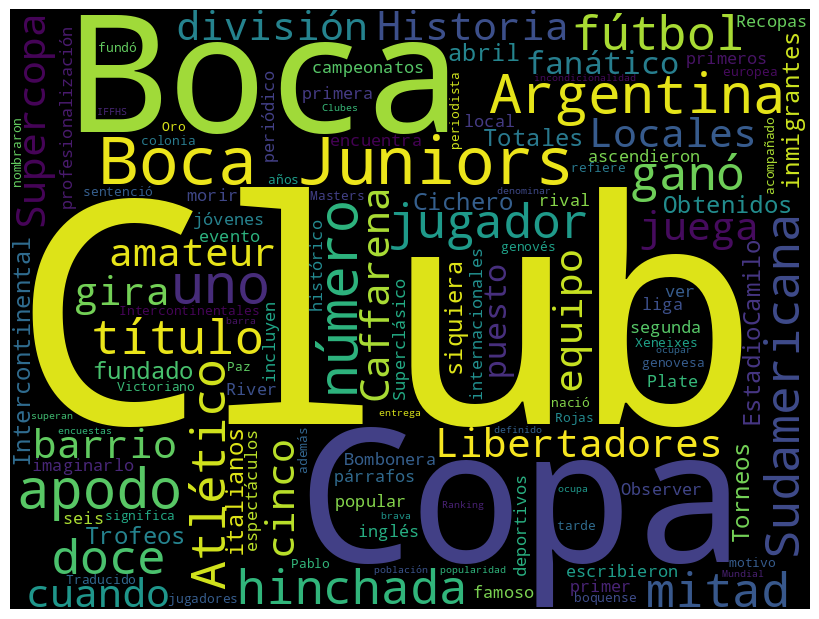

In [53]:
#Finalmente definimos stopwords para limpiar un poco el texto y que no salgan en la nube ya que son palabras repetitivas como preposiciones o articulos.
#Definimos el area y el grafico que vamos a mostrar y finalmente, creamos la nube de palabras e imprimimos el grafico.


stopwords = set(STOPWORDS) #Definir stopwords en español en una lista de palabras
stopwords.update(["utiliza", "actualmente", "vivía", "vivían", "ayudó", "según", "tienen", "llegó", "jugó", "pudo", "justamente", "sí", "motivos", "varios", "ha", "quien", "las", "gran", "debido", "del", "veces", "tras", "fue", "debe", "estos", "hay", "lo", "éste", "con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

wordcloud = WordCloud(width=800, height=600, background_color="black", stopwords=stopwords).generate(texto) #Se crea el objeto WordCloud en 800x600 y fondo negro

plt.figure(figsize=(8, 8), facecolor=None) #Con matplotlib generamos el grafico donde se va a mostrar la nube de palabras
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()